# Exploratory Analysis
## FIFA 19 Player Dataset

This dataset, obtained from Kaggle (https://www.kaggle.com/karangadiya/fifa19), contains information from all of the soccer players registered in the game FIFA 19. Aside from their names, age, nationality and club, there are other specific attributes such as their overall score, potential, stamina, and specific abilities. This set has 18,207 rows (corresponding to individual players), and 89 columns (representing their attributes); however, some of these attributes are not very useful for analysis (such as photo or flag). Therefore, the first step in cleaning the data should rely on dropping columns that are not needed for the analysis.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_eaec5b590319418ab3d2d1b79f362c89 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='QwhRprRgu5G2cudhASELP-vkb8DPRhsfFVYA8cq3kXEH',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_eaec5b590319418ab3d2d1b79f362c89.get_object(Bucket='ibmmlprofessionalcertification-donotdelete-pr-6wah3vm91cbjum',Key='FIFA19.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

raw_data = pd.read_csv(body)

In [106]:
raw_data.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [4]:
data = raw_data.drop(columns=['Unnamed: 0', 'ID', 'Photo', 'Flag','Club Logo', 'Special', 'International Reputation', 
                              'Weak Foot','Work Rate','Body Type', 'Real Face','Jersey Number', 'Joined', 'Loaned From', 
                              'Contract Valid Until','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
                              'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 
                              'RB',] ,axis=1)
data.set_index('Name',inplace=True)
data.head()

Age Nationality  Overall  Potential                 Club  \
Name                                                                          
L. Messi            31   Argentina       94         94         FC Barcelona   
Cristiano Ronaldo   33    Portugal       94         94             Juventus   
Neymar Jr           26      Brazil       92         93  Paris Saint-Germain   
De Gea              27       Spain       91         93    Manchester United   
K. De Bruyne        27     Belgium       91         92      Manchester City   

                     Value   Wage Preferred Foot  Skill Moves Position  ...  \
Name                                                                    ...   
L. Messi           €110.5M  €565K           Left          4.0       RF  ...   
Cristiano Ronaldo     €77M  €405K          Right          5.0       ST  ...   
Neymar Jr          €118.5M  €290K          Right          5.0       LW  ...   
De Gea                €72M  €260K          Right          1.0       GK  ...   
K. De Bruyne         €102M  €355K          Right          4.0      RCM  ...   

                  Composure Marking  StandingTackle  SlidingTackle  GKDiving  \
Name                                                                           
L. Messi               96.0    33.0            28.0           26.0       6.0   
Cristiano Ronaldo      95.0    28.0            31.0           23.0       7.0   
Neymar Jr              94.0    27.0            24.0           33.0       9.0   
De Gea                 68.0    15.0            21.0           13.0      90.0   
K. De Bruyne           88.0    68.0            58.0           51.0      15.0   

                   GKHandling  GKKicking  GKPositioning  GKReflexes  \
Name                                                                  
L. Messi                 11.0       15.0           14.0         8.0   
Cristiano Ronaldo        11.0       15.0           14.0        11.0   
Neymar Jr                 9.0       15.0           15.0        11.0   
De Gea                   85.0       87.0           88.0        94.0   
K. De Bruyne             13.0        5.0           10.0        13.0   

                   Release Clause  
Name                               
L. Messi                  €226.5M  
Cristiano Ronaldo         €127.1M  
Neymar Jr                 €228.1M  
De Gea                    €138.6M  
K. De Bruyne              €196.4M  

[5 rows x 47 columns]

### Dealing with Null-Values

Now, that some columns have been deleted, let's check for null values.

In [5]:
data.isnull().sum()

Age                   0
Nationality           0
Overall               0
Potential             0
Club                241
Value                 0
Wage                  0
Preferred Foot       48
Skill Moves          48
Position             60
Height               48
Weight               48
Crossing             48
Finishing            48
HeadingAccuracy      48
ShortPassing         48
Volleys              48
Dribbling            48
Curve                48
FKAccuracy           48
LongPassing          48
BallControl          48
Acceleration         48
SprintSpeed          48
Agility              48
Reactions            48
Balance              48
ShotPower            48
Jumping              48
Stamina              48
Strength             48
LongShots            48
Aggression           48
Interceptions        48
Positioning          48
Vision               48
Penalties            48
Composure            48
Marking              48
StandingTackle       48
SlidingTackle        48
GKDiving        

In this case, there are many features that contain null values. In the case of the 'Club' column, one can assume that if it a value is empty it means that the player doesn't have a club; therefore, let's assign a 'No-Club' value to these cases. For the 'Preferred Foot', 'Position', 'Height', 'Weight' columns, there aren't many missing values, so let's delete the observations that don't have this info. On the other hand, the 'Release Clause' column has a lot missing values, therefore, it is easier to just delete the entire column as a whole. Additionally, in the columns that represent abilities, the missing values can just be replaced by the mean of the column.

In [6]:
data['Club'].replace(np.nan,'No-Club',inplace=True)
data.drop('Release Clause', axis=1, inplace=True)
data.drop(data[data['Preferred Foot'].isnull()].index, inplace=True)
data.drop(data[data['Position'].isnull()].index, inplace=True)

In [7]:
data.isnull().sum()

Age                0
Nationality        0
Overall            0
Potential          0
Club               0
Value              0
Wage               0
Preferred Foot     0
Skill Moves        0
Position           0
Height             0
Weight             0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

It is evident from the previous cleaning, that the missing abilities, heights, weights corresponded to the players that were missing their position or preferred foot; therefore, modifying these values wasn't necessary.

In [8]:
data.shape

(18140, 46)

### Changing Data Types

Now, it is relevant to check the data types of each column. In this case, it can be seen that 'Value', 'Wage', 'Height' and 'Weight' columns are considered as objects rather than numbers; therefore, it is necessary to change them. Similarly, for the attributes regarding abilities, it is necessary to switch their values to an int type.

In [26]:
data.dtypes

Age                  int64
Nationality         object
Overall              int64
Potential            int64
Club                object
Value               object
Wage                object
Preferred Foot      object
Skill Moves        float64
Position            object
Height              object
Weight              object
Crossing           float64
Finishing          float64
HeadingAccuracy    float64
ShortPassing       float64
Volleys            float64
Dribbling          float64
Curve              float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Aggression         float64
Interceptions      float64
Positioning        float64
Vision             float64
Penalties          float64
C

In [59]:
def remove_euro (col_name):
    """Returns a column without the euro sign and changes the data type to float64"""
    for i in range(len(data[col_name])):
        value=data[col_name].iloc[i]
        value=value[1:]
        if value[-1]=='K':
            value=float(value[:-1])*1000
        elif value[-1]=='M':
            value=float(value[:-1])*1000000
        data[col_name].iloc[i]=value
        
    data[col_name]=data[col_name].astype('float64')
    data.rename(columns={col_name: col_name + ' (in Euros)'},inplace=True)
    

In [ ]:
remove_euro('Value')
remove_euro('Wage')

In [71]:
#For height
for i in range(len(data['Height'])):
    
    a=data['Height'][i]
    apos_ind=a.find('\'')
    cm = int((float(a[0:apos_ind])*12 + float(a[apos_ind+1:]))*2.54)
    data['Height'][i]=cm
    
data['Height'] = data['Height'].astype('int64')
data.rename(columns={'Height': 'Height (cm)'},inplace=True)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [80]:
#For weight
for i in range(len(data['Weight'])):
    
    a=data['Weight'][i]
    lbs_ind=a.find('lbs')
    kg = round(float(a[:lbs_ind])*0.45,2)
    data['Weight'][i]=kg
    
data['Weight'] = data['Weight'].astype('float64')
data.rename(columns={'Weight': 'Weight (kg)'},inplace=True)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [86]:
abilities=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina',
       'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes','Skill Moves']
data[abilities]=data[abilities].astype('int64')

In [87]:
data.dtypes

Age                   int64
Nationality          object
Overall               int64
Potential             int64
Club                 object
Value (in Euros)    float64
Wage (in Euros)     float64
Preferred Foot       object
Skill Moves           int64
Position             object
Height (cm)           int64
Weight (kg)         float64
Crossing              int64
Finishing             int64
HeadingAccuracy       int64
ShortPassing          int64
Volleys               int64
Dribbling             int64
Curve                 int64
FKAccuracy            int64
LongPassing           int64
BallControl           int64
Acceleration          int64
SprintSpeed           int64
Agility               int64
Reactions             int64
Balance               int64
ShotPower             int64
Jumping               int64
Stamina               int64
Strength              int64
LongShots             int64
Aggression            int64
Interceptions         int64
Positioning           int64
Vision              

Now, all the data is in its correct data type. Before analysing it further, it is worth saving it.

In [91]:
from IPython.display import HTML
import base64, io
def create_download_link_csv(df, title = "Download CSV file", filename = "data.csv"):  
    # generate in-memory CSV, then base64-encode it
    csv = df.to_csv(index=True)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [92]:
create_download_link_csv(data,"Download my data","cleaned_fifa19.csv")

In [3]:
# @hidden_cell
import types
from botocore.client import Config
import ibm_boto3
body = client_eaec5b590319418ab3d2d1b79f362c89.get_object(Bucket='ibmmlprofessionalcertification-donotdelete-pr-6wah3vm91cbjum',Key='cleaned_fifa19.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

In [4]:
cleaned_df = pd.read_csv(body,index_col='Name')
cleaned_df.head()

Age Nationality  Overall  Potential                 Club  \
Name                                                                          
L. Messi            31   Argentina       94         94         FC Barcelona   
Cristiano Ronaldo   33    Portugal       94         94             Juventus   
Neymar Jr           26      Brazil       92         93  Paris Saint-Germain   
De Gea              27       Spain       91         93    Manchester United   
K. De Bruyne        27     Belgium       91         92      Manchester City   

                   Value (in Euros)  Wage (in Euros) Preferred Foot  \
Name                                                                  
L. Messi                110500000.0         565000.0           Left   
Cristiano Ronaldo        77000000.0         405000.0          Right   
Neymar Jr               118500000.0         290000.0          Right   
De Gea                   72000000.0         260000.0          Right   
K. De Bruyne            102000000.0         355000.0          Right   

                   Skill Moves Position  ...  Penalties  Composure  Marking  \
Name                                     ...                                  
L. Messi                     4       RF  ...         75         96       33   
Cristiano Ronaldo            5       ST  ...         85         95       28   
Neymar Jr                    5       LW  ...         81         94       27   
De Gea                       1       GK  ...         40         68       15   
K. De Bruyne                 4      RCM  ...         79         88       68   

                   StandingTackle  SlidingTackle  GKDiving  GKHandling  \
Name                                                                     
L. Messi                       28             26         6          11   
Cristiano Ronaldo              31             23         7          11   
Neymar Jr                      24             33         9           9   
De Gea                         21             13        90          85   
K. De Bruyne                   58             51        15          13   

                   GKKicking  GKPositioning  GKReflexes  
Name                                                     
L. Messi                  15             14           8  
Cristiano Ronaldo         15             14          11  
Neymar Jr                 15             15          11  
De Gea                    87             88          94  
K. De Bruyne               5             10          13  

[5 rows x 46 columns]

### Exploring the Data

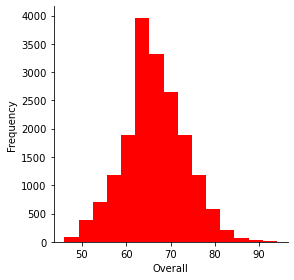

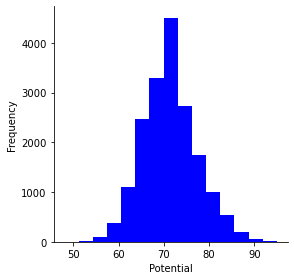

In [97]:
plot = sns.FacetGrid(cleaned_df, margin_titles=True,height=4)
plot.map(plt.hist, 'Overall', color='r', bins=15)
plot.set_axis_labels("Overall", "Frequency")

plot = sns.FacetGrid(cleaned_df, margin_titles=True,height=4)
plot.map(plt.hist, 'Potential', color='b', bins=15)
plot.set_axis_labels("Potential", "Frequency")

(0.0, 593250.0)

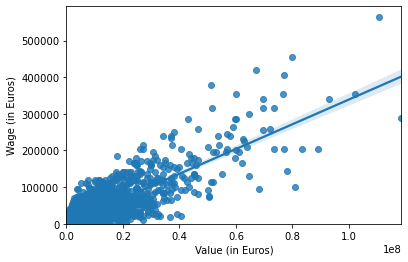

In [105]:
sns.regplot(x='Value (in Euros)', y='Wage (in Euros)', data=cleaned_df)
plt.ylim(0,)

In [29]:
left=cleaned_df[['Overall']][cleaned_df['Preferred Foot']=='Left']
right=cleaned_df[['Overall']][cleaned_df['Preferred Foot']=='Right']
left.rename(columns={'Overall': 'Overall Left'},inplace=True)
right.rename(columns={'Overall': 'Overall Right'},inplace=True)

<function matplotlib.pyplot.show(*args, **kw)>

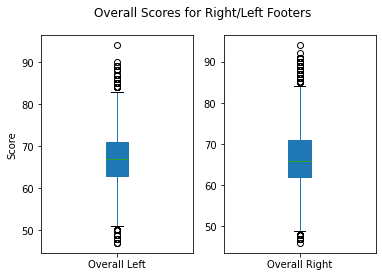

In [44]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

left.plot(kind='box', vert=True, patch_artist=True, ax=ax0)
ax0.set_ylabel('Score')
#ax0.spines['right'].set_visible(False)

right.plot(kind='box', vert=True, patch_artist=True, ax=ax1)
#ax1.spines['left'].set_visible(False)
#ax1.yaxis.set_tick_params(which='major', labelleft=False, labelright=True)
#ax1.set_yticks([]) 

fig.suptitle('Overall Scores for Right/Left Footers')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

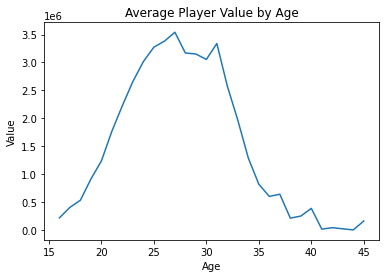

In [67]:
cleaned_df[['Age','Value (in Euros)']].groupby('Age').mean().plot(kind='line')
plt.ylabel('Value')
plt.title('Average Player Value by Age')
plt.legend().remove()
plt.show

### Hypothesis Testing

1. Soccer fans in Mexico believe that their Federation has a special talent in the formation of goalkeepers; in other words, they say that Mexican goal keepers are greater than average. Is this true?
$$ H_0: \bar{x}_{Mexico} = \mu$$
$$ H_A: \bar{x}_{Mexico} > \mu$$

   where $\mu$ is the average score of all goalkeepers and $\bar{x}_{Mexico}$ is the mean score of Mexican goalkeepers.

2. It is evident that strikers recieve more prices than any other position. However, is it true that the also get payed better than the rest of the positions?
$$ H_0: \bar{x}_{ST} = \mu$$
$$ H_A: \bar{x}_{ST} > \mu$$
   were $\mu$ is the average salary of soccer players and $\bar{x}_{ST}$ is the mean salary of strikers.

3. When it comes to penalties, are left footers better than right footers?
$$ H_0: \bar{x}_{Left} = \mu$$
$$ H_A: \bar{x}_{Left} \neq \mu$$
   were $\mu$ is the average penalty score of all soccer players and $\bar{x}_{Left}$ is the mean penalty score of left footers.

### Solving a Hypothesis Test (1)

Let's filter the data for goalkeeper and find their mean overall score.

In [5]:
pop_avg = cleaned_df['Overall'][cleaned_df['Position']=='GK'].mean().round(3)
print('Population Average: ', pop_avg)

Population Average:  64.603


In [22]:
gk_df=cleaned_df[['Nationality','Overall']][cleaned_df['Position']=='GK']
gk_df=gk_df[gk_df['Nationality']=='Mexico']
gk_df.drop('Nationality', axis=1, inplace=True)
sample=gk_df.transpose().to_numpy()
sample=sample[0]

Now, let's calculate the p_val and see if we can reject the null hypothesis with a significance level of $\alpha=0.05$.

In [26]:
from scipy import stats
t_val, p_val= stats.ttest_1samp(sample,pop_avg)
if p_val<=0.05:
    print('The null hypothesis is REJECTED')
else:
    print('The null hypothesis is ACCEPTED')

The null hypothesis is ACCEPTED


This means that with 95% certainty, one cannot say that Mexican goalkeepers are significantly better than the rest.

The next step that needs to be taken with this dataset is to simplify the age and nationality data by dividing their respective values into bins. For example, in the case of age, these bins can be: 15-18, 19-22, 23-26, and so on. Furthermore, the numerical features such as the specific abilities, height, weight, wage, and value should be scaled before generating a machine learning model. Similarly, it is necessary to encode the different categorical values depending on the nature of the feature; for example: preferred foot with binary encoding and position with one-hot-encoding.

Finally, it is worth noting that this dataset seems to be quite complete to the degree that rather than adding more data, the challenge relies on deciding which features to drop. Even though this may not appear to be a significant problem, the selection of specific features greatly depends on the type of analysis or model that needs to be constructed and, therefore, a filtering of this sort can't happen beforehand.